In [12]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
movie_reviews_data_folder = 'data/movie_reviews/txt_sentoken/'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [4]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
dataset.data, dataset.target, test_size=0.25, random_state=None)

In [5]:
 pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

/home/youneszadi/LearningPath/handsOnML/mlenv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/youneszadi/LearningPath/handsOnML/mlenv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.95,
                                                        max_features=None,
                                                        min_df=3,
                                                        ngram_range=(1, 1),
                                    

In [6]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
            grid_search.cv_results_['mean_test_score'][i],
            grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.02
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.01


In [7]:
y_predicted = grid_search.predict(docs_test)

In [8]:
print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

              precision    recall  f1-score   support

         neg       0.87      0.86      0.87       249
         pos       0.87      0.87      0.87       251

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [10]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[215  34]
 [ 33 218]]


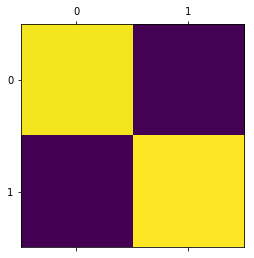

In [13]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()

In [16]:
import eli5
eli5.show_weights(grid_search.best_estimator_, top=10, target_names=dataset.target_names)

In [17]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=None,
                                 min_df=3, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1000, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
              

In [18]:
eli5.show_prediction(grid_search.best_estimator_.named_steps['clf'], dataset.data[0], 
                     vec=grid_search.best_estimator_.named_steps['vect'],
                     target_names=dataset.target_names)